In [4]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/CW60jRE0EJw", width=1920/2, height=1080/2)

In [5]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

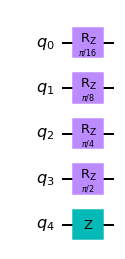

In [9]:
qc_plus_one = QuantumCircuit(5, name='qc_plus_one')
qc_plus_one.rz(math.pi/16,0)
qc_plus_one.rz(math.pi/8,1)
qc_plus_one.rz(math.pi/4,2)
qc_plus_one.rz(math.pi/2,3)
qc_plus_one.z(4)

plus1_gate = qc_plus_one.to_gate()

qc_plus_one.draw(output="mpl")

In [49]:
qc_plus_three = QuantumCircuit(5, name='qc_plus_three')
qc_plus_three.append(plus1_gate, [0,1,2,3,4])
qc_plus_three.append(plus1_gate, [0,1,2,3,4])
qc_plus_three.append(plus1_gate, [0,1,2,3,4])

plus3_gate = qc_plus_three.to_gate()
cplus3_gate = plus3_gate.control()

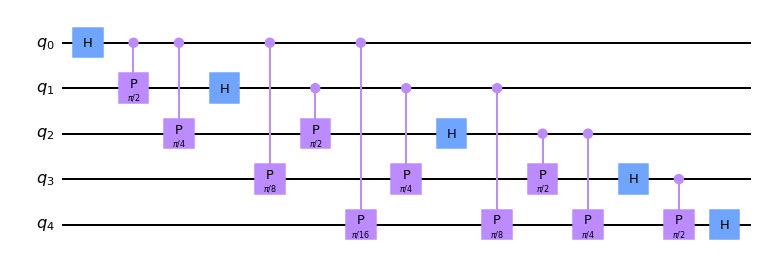

In [50]:
qft_gate_norm = QFT(num_qubits=5, approximation_degree=0, do_swaps=False, inverse=False, insert_barriers=False, name='qft_gate')
qft_gate_five = qft_gate_norm.to_gate()

qft_gate_norm.draw(output="mpl")

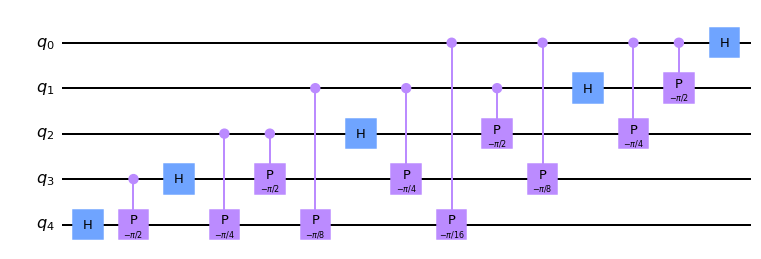

In [51]:
qft_gate_inv = QFT(num_qubits=5, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft_gate_inv')
qft_gate_five_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

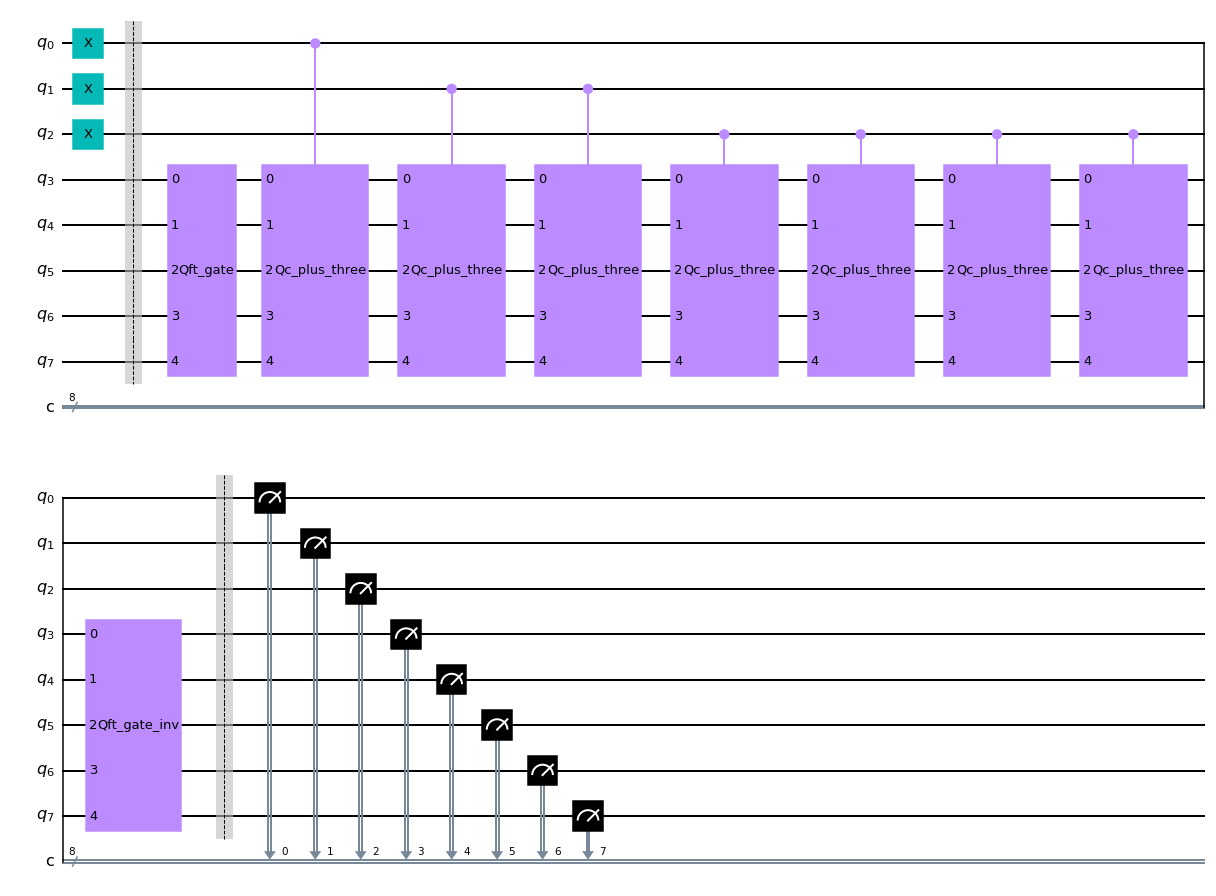

In [52]:
qc = QuantumCircuit(8,8)
qc.x(0)
qc.x(1)
qc.x(2)
qc.barrier()
qc.append(qft_gate_norm, [3,4,5,6,7])
qc.append(cplus3_gate, [0,3,4,5,6,7])
qc.append(cplus3_gate, [1,3,4,5,6,7])
qc.append(cplus3_gate, [1,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(cplus3_gate, [2,3,4,5,6,7])
qc.append(qft_gate_inv, [3,4,5,6,7])
qc.barrier()
qc.measure([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])

qc.draw(output="mpl")

In [53]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [54]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

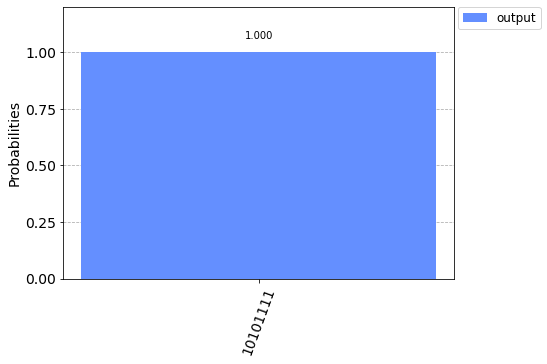

In [55]:
plot_histogram([sim_counts], legend=['output'])

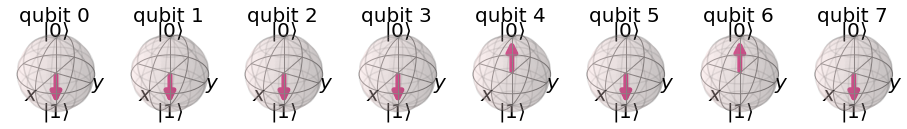

In [56]:
plot_bloch_multivector(sim_state_vector)

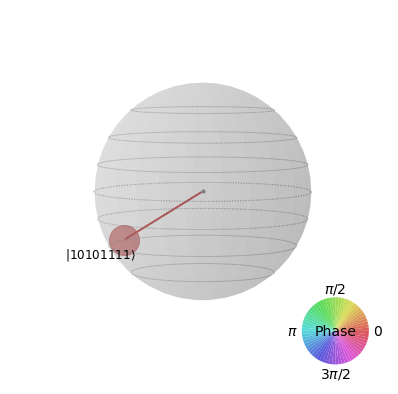

In [57]:
plot_state_qsphere(sim_state_vector)

In [58]:
import numpy as np
from qiskit import QuantumCircuit
import kaleidoscope.qiskit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from kaleidoscope import qsphere, bloch_sphere

In [59]:
bloch_sphere(qft_plus_one.statevector())

In [60]:
qsphere(qft_plus_one.statevector())

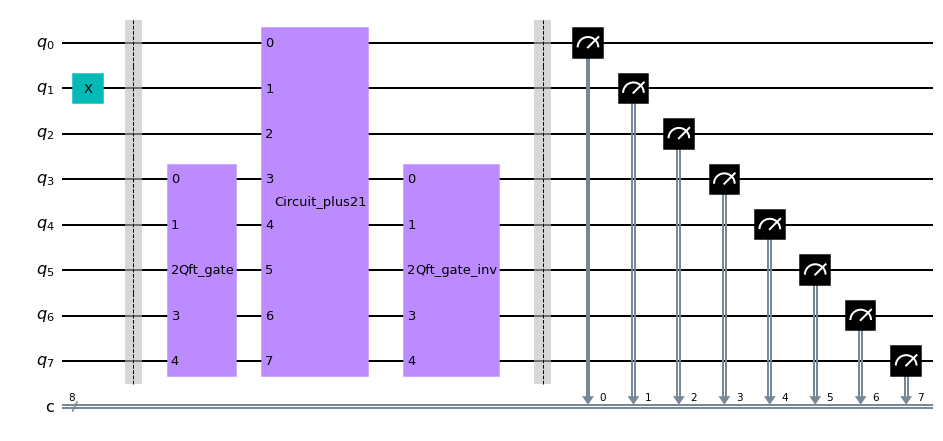

In [61]:
qc_plus21 = QuantumCircuit(8, name="circuit_plus21")

qc_plus21.append(cplus3_gate, [0,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [1,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [1,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [2,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [2,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [2,3,4,5,6,7])
qc_plus21.append(cplus3_gate, [2,3,4,5,6,7])

gate_plus21 = qc_plus21.to_gate()

#circuit simplification
qc = QuantumCircuit(8,8)
#qc.x(0)
qc.x(1)
#qc.x(2)
qc.barrier()
qc.append(qft_gate_norm, [3,4,5,6,7])
qc.append(gate_plus21, [0,1,2,3,4,5,6,7])
qc.append(qft_gate_inv, [3,4,5,6,7])
qc.barrier()
qc.measure([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])

qc.draw(output="mpl")

In [62]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [63]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

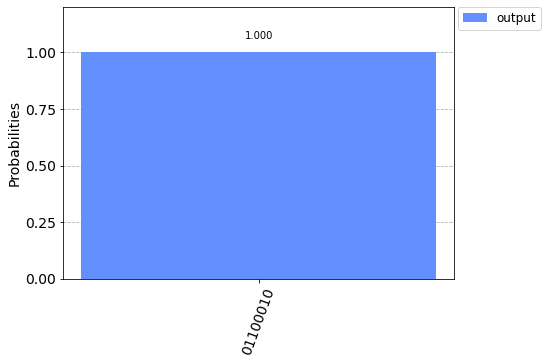

In [64]:
plot_histogram([sim_counts], legend=['output'])

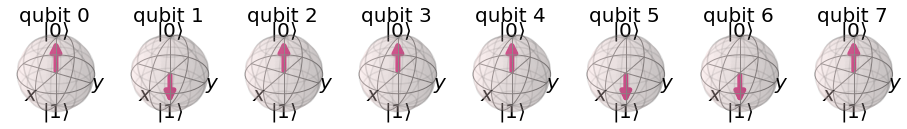

In [65]:
plot_bloch_multivector(sim_state_vector)

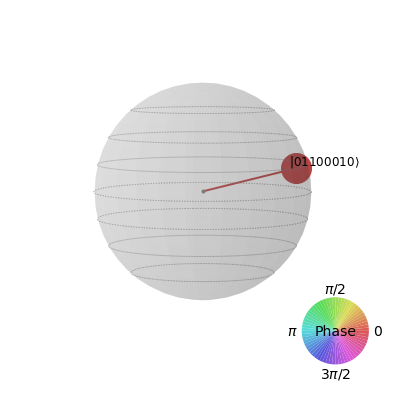

In [66]:
plot_state_qsphere(sim_state_vector)